In [7]:
import util.util_validation as ut_val
import util.util_shape_bias as ut_sb

from util.util_logging import create_distances_md, create_shape_bias_md

In [20]:
exclude_params_dict = {"tag": ["CropSize32", "divergent", "toSlow", "lrAdjust1", "lrAdjust2", "noCosine", "bszAdjust1"]}
keep_params_dict = {"aug": ["colorJitter", "grayscale"]}
models_dict, df_modelNames = ut_val.collect_models_dict(epoch="last", dataset_classifier="", exclude_params_dict=exclude_params_dict, keep_params_dict=keep_params_dict)
print(df_modelNames.to_markdown(index=False))

| model_name                                                                            |
|:--------------------------------------------------------------------------------------|
| CE_animals10_diff_-1+4000_allAug                                                      |
| CE_animals10_diff_-1+8000_allAug                                                      |
| CE_animals10_diff_-1_allAug                                                           |
| CE_animals10_diff_4000_allAug                                                         |
| SupConHybrid_animals10_diff_-1+4000_cAug                                              |
| SupCon_100.0_animals10_diff_-1+4000_cAugSameSAug_fineTuneCAsameSAFactor100            |
| SupCon_100.0_animals10_diff_-1+4000_cAugSameSAug_fineTuneCAsameSAFactor100NoNormalize |
| SupCon_20.0_animals10_diff_-1+4000_cAugSameSAug                                       |
| SupCon_5.0_animals10_diff_-1+4000_cAugSameSAug_factor5cAugSameSAug                    |
| SupCon_5

In [17]:
cuda_device = 1

dataset_cue_conflict = "shape_texture_conflict_animals10_many"

dataset_orig = "animals10_diff_-1"
dataset_shape = "stylized_animals10"
dataset_diff = "animals10_diff_4000"

## Validations

### Cue Conflict Shape Bias

Get predictions for shape texture cue conflict dataset


100%|██████████| 897/897 [04:24<00:00,  3.39it/s]


,SupCon_100.0_animals10_diff_-1+4000_cAugSameSAug
shape_bias,0.602688
shape_bias_b,0.602688
acc,0.261733
acc_b,0.261733
acc_shape,0.157743
acc_b_shape,0.157743
acc_texture,0.103990
acc_b_texture,0.103990


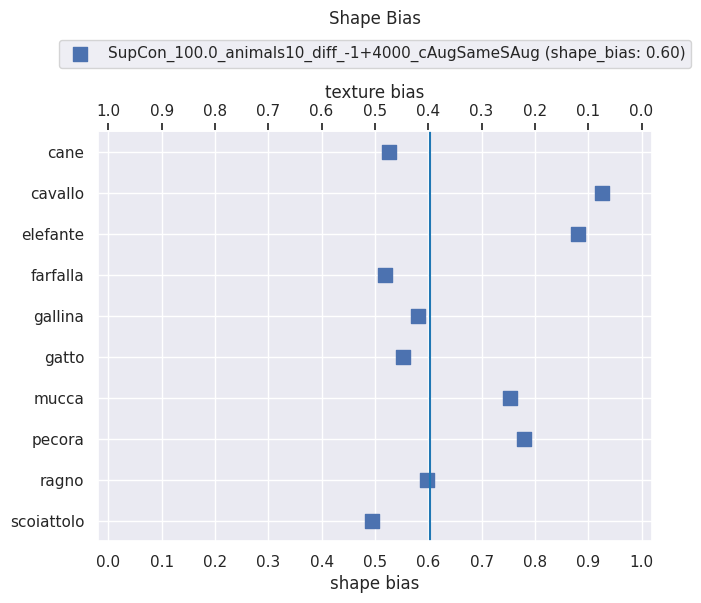

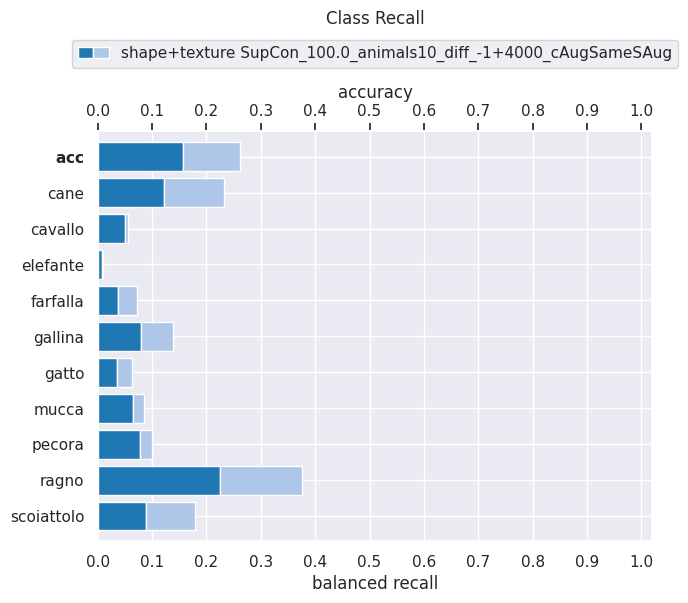

In [4]:
df_biases, class_biases = ut_sb.cue_conflict_shape_bias_metric_for_many(models_dict, dataset_cue_conflict, cuda_device)
ut_sb.save_cue_conflict_shape_bias_to_csv_file_for_many(models_dict, df_biases, class_biases, dataset_cue_conflict, save_plots=True)

for m in models_dict:
    root_model, _ = models_dict[m]
    path_folder, _ = ut_val.get_paths_from_model_checkpoint(root_model)
    create_shape_bias_md(path_folder)

df_biases

### Correlation Coefficient Shape Bias

In [5]:
df_dimensions = ut_sb.corelation_coefficient_shape_bias_metric_for_many(models_dict, dataset_orig, dataset_shape, cuda_device, separate_color=False, apply_ColorJitter=[])
ut_sb.save_correlation_coefficient_shape_bias_to_csv_file_for_many(models_dict, df_dimensions, dataset_dict={"shape": dataset_shape, "texture": dataset_orig},
                                                                   apply_ColorJitter=[])

for m in models_dict:
    root_model, _ = models_dict[m]
    path_folder, _ = ut_val.get_paths_from_model_checkpoint(root_model)
    create_shape_bias_md(path_folder)

df_dimensions

100%|██████████| 202/202 [01:01<00:00,  3.29it/s]


,shape_dims,texture_dims,remaining_dims
SupCon_100.0_animals10_diff_-1+4000_cAugSameSAug,137,123,252


#### Separate Color

In [6]:
df_dimensions = ut_sb.corelation_coefficient_shape_bias_metric_for_many(models_dict, dataset_orig, dataset_shape, cuda_device, separate_color=True, apply_ColorJitter=["texture"])
ut_sb.save_correlation_coefficient_shape_bias_to_csv_file_for_many(models_dict, df_dimensions, dataset_dict={"shape": dataset_shape, "texture": dataset_orig, "color": dataset_orig},
                                                                   apply_ColorJitter=["texture"])

for m in models_dict:
    root_model, _ = models_dict[m]
    path_folder, _ = ut_val.get_paths_from_model_checkpoint(root_model)
    create_shape_bias_md(path_folder)

df_dimensions

100%|██████████| 202/202 [04:24<00:00,  1.31s/it]


,shape_dims,texture_dims,color_dims,remaining_dims
SupCon_100.0_animals10_diff_-1+4000_cAugSameSAug,116,100,82,214


#### Form Cue Conflict Dataset

In [7]:
df_dimensions = ut_sb.corelation_coefficient_shape_bias_metric_from_cue_conflict_dataset_for_many(models_dict, dataset_cue_conflict, cuda_device)
ut_sb.save_correlation_coefficient_shape_bias_to_csv_file_for_many(models_dict, df_dimensions, dataset_dict={"cue_conflict": dataset_cue_conflict})

for m in models_dict:
    root_model, _ = models_dict[m]
    path_folder, _ = ut_val.get_paths_from_model_checkpoint(root_model)
    create_shape_bias_md(path_folder)

df_dimensions

100%|██████████| 897/897 [08:46<00:00,  1.70it/s]


,shape_dims,texture_dims,remaining_dims
SupCon_100.0_animals10_diff_-1+4000_cAugSameSAug,114,142,256


-----

In [8]:
df_dimensions = ut_sb.corelation_coefficient_shape_bias_metric_for_many(models_dict, dataset_orig, dataset_diff, cuda_device, separate_color=False, apply_ColorJitter=["shape"])
ut_sb.save_correlation_coefficient_shape_bias_to_csv_file_for_many(models_dict, df_dimensions, dataset_dict={"shape": dataset_diff, "texture": dataset_orig},
                                                                   apply_ColorJitter=["shape"])

for m in models_dict:
    root_model, _ = models_dict[m]
    path_folder, _ = ut_val.get_paths_from_model_checkpoint(root_model)
    create_shape_bias_md(path_folder)

df_dimensions

100%|██████████| 202/202 [02:10<00:00,  1.54it/s]


,shape_dims,texture_dims,remaining_dims
SupCon_100.0_animals10_diff_-1+4000_cAugSameSAug,193,104,215


In [9]:
df_dimensions = ut_sb.corelation_coefficient_shape_bias_metric_for_many(models_dict, dataset_orig, dataset_diff, cuda_device, separate_color=True, apply_ColorJitter=["shape", "texture"])
ut_sb.save_correlation_coefficient_shape_bias_to_csv_file_for_many(models_dict, df_dimensions, dataset_dict={"shape": dataset_diff, "texture": dataset_orig, "color": dataset_orig},
                                                                   apply_ColorJitter=["shape", "texture"])

for m in models_dict:
    root_model, _ = models_dict[m]
    path_folder, _ = ut_val.get_paths_from_model_checkpoint(root_model)
    create_shape_bias_md(path_folder)

df_dimensions

100%|██████████| 202/202 [04:23<00:00,  1.30s/it]


,shape_dims,texture_dims,color_dims,remaining_dims
SupCon_100.0_animals10_diff_-1+4000_cAugSameSAug,167,87,71,187


-----------

#### Experiments

In [30]:
import numpy as np

model_short_name = "SupCon_20.0_animals10_diff_-1+4000_cAugSameSAug"

root_model = models_dict[model_short_name][0]

embedding_orig, embedding_shape, embedding_texture, class_labels = ut_sb.compute_load_orig_shape_texture_embeddings(root_model, dataset_orig, dataset_shape, cuda_device, separate_color=False, apply_ColorJitter=[])
corr_coef_shape = ut_sb.compute_dim_correlation_coefficients(embedding_orig, embedding_shape)
corr_coef_texture = ut_sb.compute_dim_correlation_coefficients(embedding_orig, embedding_texture)

100%|██████████| 202/202 [01:00<00:00,  3.33it/s]


In [71]:
model_short_name = "SupCon_20.0_animals10_diff_-1+4000_cAugSameSAug"

root_model = models_dict[model_short_name][0]

embedding, _, _, _, shapeName_textureName_list = ut_sb.compute_cue_conflict_embeddings(root_model, dataset_cue_conflict, cuda_device)

# determent the shape and texture pairs in the cue conflict embedding
shape_pairs = []
shape_array = np.array([sN for sN,_ in shapeName_textureName_list])
for sN in set(shape_array):
    shape_indices = np.where(shape_array == sN)[0]
    shape_pairs.append(shape_indices)

shape_pair_A = np.concatenate([np.tile(shape_pairs[i], reps=len(shape_pairs[i])-1) for i in range(len(shape_pairs))])
shape_pair_B = np.concatenate([np.concatenate([np.roll(shape_pairs[i], shift=j) for j in range(1,len(shape_pairs[i]))]) for i in range(len(shape_pairs))])

texture_pairs = []
texture_array = np.array([tN for _,tN in shapeName_textureName_list])
for tN in set(texture_array):
    texture_indices = np.where(texture_array == tN)[0]
    texture_pairs.append(texture_indices)

texture_pair_A = np.concatenate([np.tile(texture_pairs[i], reps=len(texture_pairs[i])-1) for i in range(len(texture_pairs))])
texture_pair_B = np.concatenate([np.concatenate([np.roll(texture_pairs[i], shift=j) for j in range(1,len(texture_pairs[i]))]) for i in range(len(texture_pairs))])

corr_coef_shape_2 = ut_sb.compute_dim_correlation_coefficients(embedding[shape_pair_A], embedding[shape_pair_B])
corr_coef_texture_2 = ut_sb.compute_dim_correlation_coefficients(embedding[texture_pair_A], embedding[texture_pair_B])

100%|██████████| 897/897 [04:06<00:00,  3.64it/s]


In [185]:
model_short_name = "SupCon_20.0_animals10_diff_-1+4000_cAugSameSAug"

root_model = models_dict[model_short_name][0]

_, embedding_diff_4000, _, class_labels = ut_sb.compute_load_orig_shape_texture_embeddings(root_model, dataset_orig, "animals10_diff_4000", cuda_device, separate_color=False, apply_ColorJitter=["shape"])
corr_coef_diff_4000 = ut_sb.compute_dim_correlation_coefficients(embedding_orig, embedding_diff_4000)

100%|██████████| 202/202 [01:01<00:00,  3.30it/s]


In [201]:
eps = 0.0

argsort_shape = np.argsort(corr_coef_shape)
argsort_texture = np.argsort(corr_coef_texture)

argsort_shape_2 = np.argsort(corr_coef_shape_2)
argsort_texture_2 = np.argsort(corr_coef_texture_2)

argsort_diff_4000 = np.argsort(corr_coef_diff_4000)

larger_shape_corr_coef_A = (corr_coef_shape - eps > corr_coef_texture).astype(int)
larger_shape_corr_coef_B = (corr_coef_shape_2 - eps > corr_coef_texture_2).astype(int)
larger_shape_corr_coef_C = (corr_coef_shape - eps > corr_coef_texture_2).astype(int)
larger_shape_corr_coef_D = (corr_coef_shape_2 - eps > corr_coef_texture).astype(int)
larger_shape_corr_coef_E = (corr_coef_diff_4000 - eps > corr_coef_texture).astype(int)
larger_shape_corr_coef_F = (corr_coef_diff_4000 - eps > corr_coef_texture_2).astype(int)

larger_texture_corr_coef_A = (corr_coef_shape + eps < corr_coef_texture).astype(int)
larger_texture_corr_coef_B = (corr_coef_shape_2 + eps < corr_coef_texture_2).astype(int)
larger_texture_corr_coef_C = (corr_coef_shape + eps < corr_coef_texture_2).astype(int)
larger_texture_corr_coef_D = (corr_coef_shape_2 + eps < corr_coef_texture).astype(int)
larger_texture_corr_coef_E = (corr_coef_diff_4000 + eps < corr_coef_texture).astype(int)
larger_texture_corr_coef_F = (corr_coef_diff_4000 + eps < corr_coef_texture_2).astype(int)

shape_larger_A = (larger_shape_corr_coef_A == 1).sum()
texture_larger_A = (larger_texture_corr_coef_A == 1).sum()

shape_larger_B = (larger_shape_corr_coef_B == 1).sum()
texture_larger_B = (larger_texture_corr_coef_B == 1).sum()

shape_larger_ABCD = (larger_shape_corr_coef_A + larger_shape_corr_coef_B + larger_shape_corr_coef_C + larger_shape_corr_coef_D == 4).sum()
texture_larger_ABCD = (larger_texture_corr_coef_A + larger_texture_corr_coef_B + larger_texture_corr_coef_C + larger_texture_corr_coef_D == 4).sum()

shape_larger_E = (larger_shape_corr_coef_E == 1).sum()
texture_larger_E = (larger_texture_corr_coef_E == 1).sum()

shape_larger_ABCDEF = (larger_shape_corr_coef_A + larger_shape_corr_coef_B + larger_shape_corr_coef_C + larger_shape_corr_coef_D + larger_shape_corr_coef_E +larger_shape_corr_coef_F == 6).sum()
texture_larger_ABCDEF = (larger_texture_corr_coef_A + larger_texture_corr_coef_B + larger_texture_corr_coef_C + larger_texture_corr_coef_D + larger_texture_corr_coef_E + larger_texture_corr_coef_F == 6).sum()

print(f"A: shape: {shape_larger_A}, texture: {texture_larger_A}   {ut_sb.estimate_dims([corr_coef_shape, corr_coef_texture])}")

print(f"\nB: shape: {shape_larger_B}, texture: {texture_larger_B}   {ut_sb.estimate_dims([corr_coef_shape_2, corr_coef_texture_2])}")

print(f"\nABCD: shape: {shape_larger_ABCD}, texture: {texture_larger_ABCD}")

print(f"\nE: shape: {shape_larger_E}, texture: {texture_larger_E}   {ut_sb.estimate_dims([corr_coef_diff_4000, corr_coef_texture])}")

print(f"\nABCDEF: shape: {shape_larger_ABCDEF}, texture: {texture_larger_ABCDEF}")

A: shape: 230, texture: 282   [128, 131, 253]

B: shape: 36, texture: 476   [104, 157, 251]

ABCD: shape: 13, texture: 249

E: shape: 512, texture: 0   [198, 107, 207]

ABCDEF: shape: 13, texture: 0


### Feature Embedding Distances

In [10]:
df_distances = ut_sb.compute_distance_to_diff_for_many(models_dict, dataset_orig, dataset_diff, cuda_device, plot_hist=False)
ut_sb.save_dist_to_csv_file_for_many(models_dict, df_distances, dataset_orig, dataset_diff)

for m in models_dict:
    root_model, _ = models_dict[m]
    path_folder, _ = ut_val.get_paths_from_model_checkpoint(root_model)
    create_distances_md(path_folder)

df_distances

100%|██████████| 5236/5236 [01:36<00:00, 54.03it/s]


,SupCon_100.0_animals10_diff_-1+4000_cAugSameSAug
mean_distance_related,0.000430
std_distance_related,0.000816
mean_distance_classes,0.252440
std_distance_classes,0.155461
mean_distance_all_vs_all,0.252750
std_distance_all_vs_all,0.150203
min_distance,0.000002
max_distance,0.854468


#### Distance to stylized Images

In [22]:
df_distances = ut_sb.compute_distance_to_diff_for_many(models_dict, dataset_orig, dataset_shape, cuda_device, plot_hist=False)
ut_sb.save_dist_to_csv_file_for_many(models_dict, df_distances, dataset_orig, dataset_shape)

for m in models_dict:
    root_model, _ = models_dict[m]
    path_folder, _ = ut_val.get_paths_from_model_checkpoint(root_model)
    create_distances_md(path_folder)

df_distances

100%|██████████| 5236/5236 [01:18<00:00, 66.99it/s]


,SupConHybrid_animals10_diff_-1+4000_cAug,SupCon_animals10_diff_-1+4000_cAugSameSAug,SupCon_20.0_animals10_diff_-1+4000_cAugSameSAug,SupCon_animals10_diff_-1_allAug,SupCon_animals10_diff_-1+8000_cAugSameSAug,CE_animals10_diff_4000_allAug,CE_animals10_diff_-1+4000_allAug,CE_animals10_diff_-1_allAug,CE_animals10_diff_-1+8000_allAug,SupCon_5.0_animals10_diff_-1+4000_cAugSameSAug_factor5cAugSameSAug,SupCon_5.0_animals10_diff_-1+4000_cAugSameSAug_fineTuneCAsameSAFactor5,SupCon_100.0_animals10_diff_-1+4000_cAugSameSAug_fineTuneCAsameSAFactor100,SupCon_100.0_animals10_diff_-1+4000_cAugSameSAug_fineTuneCAsameSAFactor100NoNormalize
mean_distance_related,0.254787,0.248920,0.361863,0.278051,0.251142,0.181488,0.117795,0.126678,0.112508,0.320663,0.274372,0.320240,0.200713
std_distance_related,0.106073,0.093043,0.123242,0.102435,0.093737,0.112764,0.056956,0.059372,0.054843,0.111433,0.105358,0.124245,0.097236
mean_distance_classes,0.328186,0.302913,0.444579,0.323084,0.302738,0.203908,0.132869,0.139225,0.127791,0.384695,0.342740,0.400948,0.294915
std_distance_classes,0.103241,0.090911,0.105307,0.097598,0.088628,0.113139,0.059399,0.060445,0.057345,0.098249,0.100174,0.113134,0.101818
mean_distance_all_vs_all,0.333541,0.333369,0.458618,0.360261,0.331887,0.215458,0.159703,0.169552,0.152450,0.408765,0.368043,0.418762,0.296389
std_distance_all_vs_all,0.101172,0.086561,0.097305,0.091893,0.084531,0.108303,0.063522,0.065500,0.061351,0.090989,0.094552,0.105415,0.097503
min_distance,0.027949,0.033520,0.025516,0.049870,0.017971,0.012979,0.008871,0.011065,0.011662,0.015268,0.014614,0.017499,0.023885
max_distance,0.862702,0.916382,0.931980,0.920808,0.883462,0.868145,0.722765,0.752928,0.714770,0.929515,0.908335,0.928537,0.804522


# Experiments

In [81]:
import os
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn
from torch.utils.data import Dataset
from tqdm import tqdm

import util.util_validation as ut_val
import util.util_shape_bias as ut_sb
from util.util_logging import open_csv_file
from util.util_pre_com_feat import IdentityWrapperNet

seaborn.set_style("darkgrid")

In [2]:
exclude_params_dict = {"tag": ["CropSize32", "divergent", "toSlow", "lrAdjust1", "lrAdjust2", "noCosine", "bszAdjust1"]}
keep_params_dict = {"aug": ["colorJitter", "grayscale"]}
models_dict, df_modelNames = ut_val.collect_models_dict(epoch="last", dataset_classifier="", exclude_params_dict=exclude_params_dict, keep_params_dict=keep_params_dict)
print(df_modelNames.to_markdown(index=False))

| model_name                                                             |
|:-----------------------------------------------------------------------|
| CE_animals10_diff_-1+4000_allAug                                       |
| CE_animals10_diff_-1_allAug                                            |
| CE_animals10_diff_4000_allAug                                          |
| SupConHybrid_animals10_diff_-1+4000_cAug                               |
| SupCon_20.0_animals10_diff_-1+4000_cAugSameSAug                        |
| SupCon_5.0_animals10_diff_-1+4000_cAugSameSAug_factor5cAugSameSAug     |
| SupCon_5.0_animals10_diff_-1+4000_cAugSameSAug_fineTuneCAsameSAFactor5 |
| SupCon_animals10_diff_-1+4000_cAugSameSAug                             |
| SupCon_animals10_diff_-1_allAug                                        |


In [13]:
cuda_device = 1

dataset_cue_conflict = "shape_texture_conflict_animals10_many"

dataset_orig = "animals10_diff_-1"
dataset_shape = "stylized_animals10"
dataset_diff = "animals10_diff_4000"

In [125]:
model_short_name = "SupCon_5.0_animals10_diff_-1+4000_cAugSameSAug_factor5cAugSameSAug"

root_model, dataset_classifier = models_dict[model_short_name]

## Analyse Cue Conflict Predictions

In [43]:
class featureEmbeddingDataset(Dataset):

    def __init__(self, root=None, data=None, targets=None):
        
        if root is not None:
            assert data is None and targets is None
            with open(root, 'rb') as f:
                entry = pickle.load(f, encoding='latin1')
                self.data = entry['data']
                self.targets = entry['labels']
        else:
            assert data is not None and targets is not None
            assert 1 <= len(targets.shape) <= 2
            self.data = data
            self.targets = targets

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):

        feature = torch.from_numpy(self.data[index])
        if len(self.targets.shape) == 1:
            target = self.targets[index]
        else:
            target = []
            for j in range(self.targets.shape[1]):
                target.append(self.targets[index,j])

        return feature, target

In [126]:
embedding_cue_conf, shape_labels, texture_labels, classes, shapeName_textureName_list = ut_sb.compute_cue_conflict_embeddings(root_model, dataset_cue_conflict, cuda_device)

100%|██████████| 897/897 [09:03<00:00,  1.65it/s]


In [127]:
labels = np.stack((shape_labels, texture_labels), axis=-1)

shapeName_list = [stn[0] for stn in shapeName_textureName_list]
textureName_list = [stn[1] for stn in shapeName_textureName_list]

distinct_shape_names = sorted(set(shapeName_list))
distinct_texture_names = sorted(set(textureName_list))

In [130]:
conflict_dataset = featureEmbeddingDataset(data=embedding_cue_conf, targets=labels)
conflict_dataloader = torch.utils.data.DataLoader(conflict_dataset, batch_size=256, shuffle=False, num_workers=16, pin_memory=True)

path_folder, _ = ut_val.get_paths_from_model_checkpoint(root_model)
params = open_csv_file(os.path.join(path_folder, "params.csv"))

if "method" in params:
    path_classifier = ut_val.get_path_classifier(root_model, dataset_classifier, params)
    classifier = ut_val.load_classifier_checkpoint(path_classifier, params["model"], len(classes), cuda_device)
else:
    model = ut_val.set_model(root_model, params, cuda_device)
    classifier = model.fc

identity_model = IdentityWrapperNet()

df_pred = ut_val.shape_texture_predictions(identity_model, classifier, conflict_dataloader, cuda_device)


df_pred["shape_img"] = shapeName_list
df_pred["texture_img"] = textureName_list

  0%|          | 0/92 [00:00<?, ?it/s]

100%|██████████| 92/92 [00:00<00:00, 107.51it/s]


In [132]:
number_of_unique_preds_s = []
shannon_diversity_index_s = []
for sn in tqdm(distinct_shape_names):
    df_sn = df_pred[df_pred.shape_img == sn]
    frequencies = df_sn.groupby("pred_class").count()["shape_img"].values

    number_of_unique_preds_s.append(len(frequencies))

    probabilities = frequencies / frequencies.sum()
    shannon_diversity_index_s.append(-np.sum(probabilities * np.log(probabilities)))

shannon_equitability_index_s = np.array(shannon_diversity_index_s) / np.log(number_of_unique_preds_s)
shannon_equitability_index_s = np.nan_to_num(shannon_equitability_index_s)

100%|██████████| 2590/2590 [00:09<00:00, 265.24it/s]
/tmp/ipykernel_46770/858080359.py:12: RuntimeWarning: invalid value encountered in divide
  shannon_equitability_index_s = np.array(shannon_diversity_index_s) / np.log(number_of_unique_preds_s)


In [135]:
number_of_unique_preds_t = []
shannon_diversity_index_t = []
for tn in tqdm(distinct_texture_names):
    df_tn = df_pred[df_pred.texture_img == tn]
    frequencies = df_tn.groupby("pred_class").count()["texture_img"].values

    number_of_unique_preds_t.append(len(frequencies))

    probabilities = frequencies / frequencies.sum()
    shannon_diversity_index_t.append(-np.sum(probabilities * np.log(probabilities)))

shannon_equitability_index_t = np.array(shannon_diversity_index_t) / np.log(number_of_unique_preds_t)
shannon_equitability_index_t = np.nan_to_num(shannon_equitability_index_t)

  0%|          | 0/225 [00:00<?, ?it/s]

100%|██████████| 225/225 [00:00<00:00, 237.71it/s]
/tmp/ipykernel_46770/225689415.py:12: RuntimeWarning: invalid value encountered in divide
  shannon_equitability_index_t = np.array(shannon_diversity_index_t) / np.log(number_of_unique_preds_t)


(-0.01, 1.01)

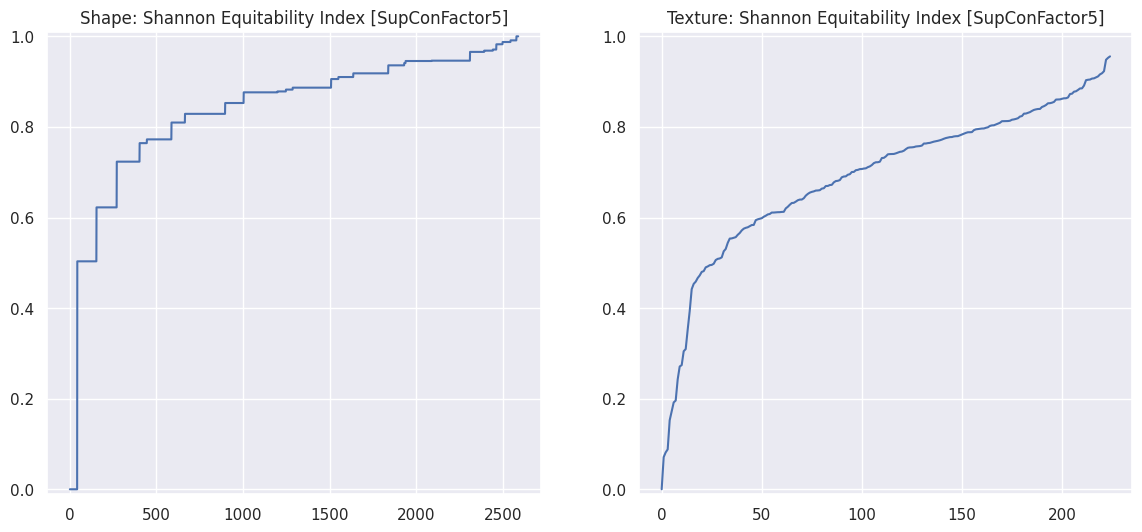

In [136]:
fig, axs = plt.subplots(ncols=2, figsize=(14,6))

axs[0].plot(np.sort(shannon_equitability_index_s))
axs[0].set_title("Shape: Shannon Equitability Index [SupConFactor5]")
axs[0].set_ylim(-0.01,1.01)

axs[1].plot(np.sort(shannon_equitability_index_t))
axs[1].set_title("Texture: Shannon Equitability Index [SupConFactor5]")
axs[1].set_ylim(-0.01,1.01)

(-0.01, 1.01)

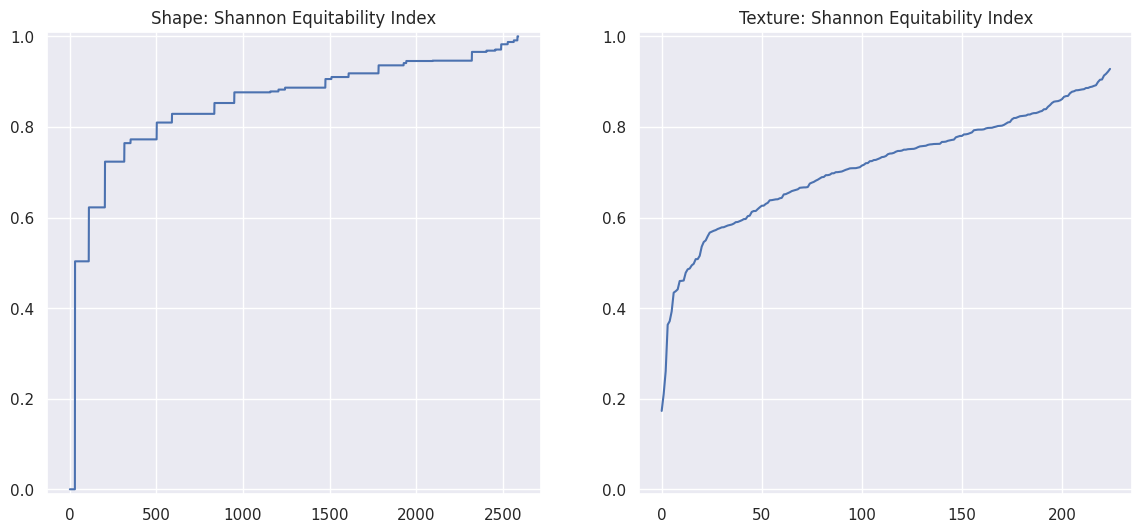

In [122]:
fig, axs = plt.subplots(ncols=2, figsize=(14,6))

axs[0].plot(np.sort(shannon_equitability_index_s))
axs[0].set_title("Shape: Shannon Equitability Index [CE_orig]")
axs[0].set_ylim(-0.01,1.01)

axs[1].plot(np.sort(shannon_equitability_index_t))
axs[1].set_title("Texture: Shannon Equitability Index [CE_orig]")
axs[1].set_ylim(-0.01,1.01)